In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy, copy
from imblearn.combine import SMOTETomek
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/sample_data/Loan_default.csv")

In [ ]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [ ]:
# Checking multiple rows
assert df['LoanID'].nunique() == len(df) # Df is a at single row level .

In [ ]:
df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [ ]:
df.shape

(255347, 18)

In [ ]:
df.head().T

,0,1,2,3,4
LoanID,I38PQUQS96,HPSK72WA7R,C1OZ6DPJ8Y,V2KKSFM3UN,EY08JDHTZP
Age,56,69,46,32,60
Income,85994,50432,84208,31713,20437
LoanAmount,50587,124440,129188,44799,9139
CreditScore,520,458,451,743,633
MonthsEmployed,80,15,26,0,8
NumCreditLines,4,1,3,3,4
InterestRate,15.23,4.81,21.17,7.07,6.51
LoanTerm,36,60,24,24,48
DTIRatio,0.44,0.68,0.31,0.23,0.73


**---------------------Analysing Target Variable---------------------**

1.   List item
2.   List item



<Axes: xlabel='Default', ylabel='count'>

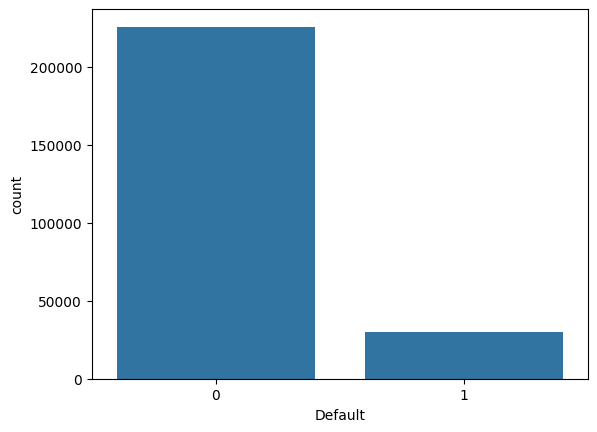

In [ ]:
sns.countplot(x="Default",data=df) # Use Pie Chart to represent %s

In [ ]:
df['Default'].value_counts()*100/len(df)

Default
0    88.387175
1    11.612825
Name: count, dtype: float64

considering 0 for no and 1 for yes , i.e.  1 represent defaulter and 0 means non-defaulter

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


Nearly 80-20 ratio so highy imbalanced dataset , as model will get biased , thus will resolve this while splitting train and test.

**---------------------Analysing Independent Variables---------------------**

<Axes: xlabel='LoanAmount', ylabel='Count'>

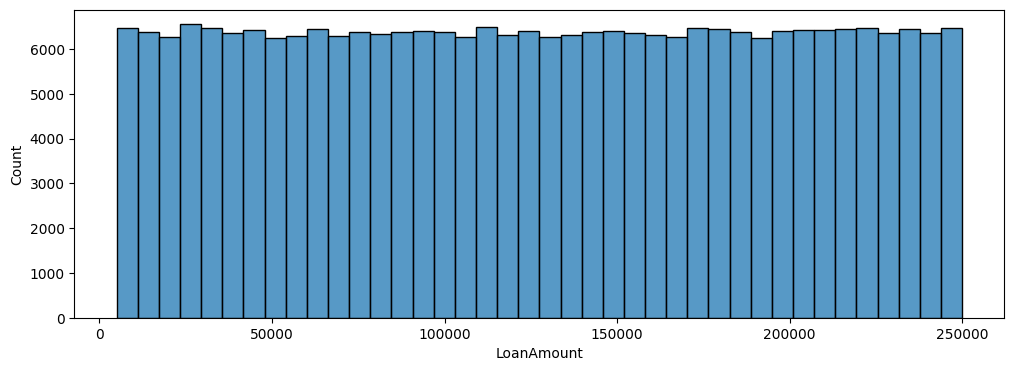

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['LoanAmount'],bins=40)

## Bin the loan amount using pd.cut(). Create 10 bins and then do barplot

data point with credit loan amount 800000 is an outlier.

In [ ]:
df['CreditScore'].nunique()

550

<Axes: xlabel='CreditScore', ylabel='Count'>

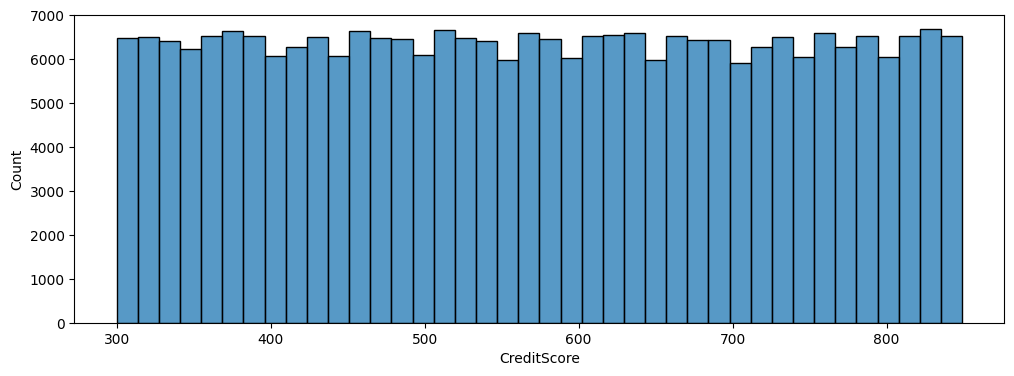

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['CreditScore'],bins=40)

## Do a correlation matrix or A pairplot to analyse let's say Age and Income vs Credit Score

In [ ]:
df['Age'].nunique()

52

<Axes: xlabel='Age', ylabel='Count'>

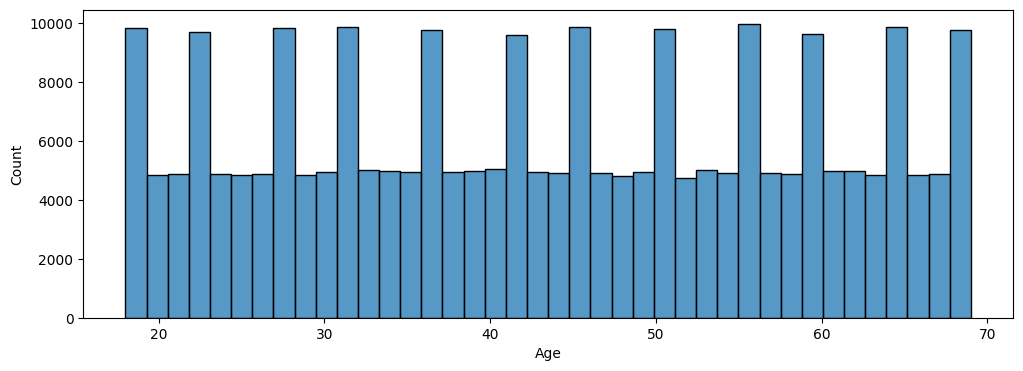

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['Age'],bins=40)

In [ ]:
df['NumCreditLines'].nunique()

4

In [ ]:
df['Years in current job'].value_counts()

KeyError: 'Years in current job'

In [ ]:
sns.countplot(x="NumCreditLines",data=df)

In [ ]:
sns.countplot(x="Years in current job",hue='Defaulter',data=df)

In [ ]:
df['Monthly Debt'].nunique()

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['Monthly Debt'],bins=40)

In [ ]:
df['Years of Credit History'].nunique()

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['Years of Credit History'],bins=40)

In [ ]:
df['Months since last delinquent'].nunique()

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['Months since last delinquent'],bins=40)

In [ ]:
df['Number of Open Accounts'].value_counts()

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['Number of Open Accounts'],bins=40)

In [ ]:
df['Number of Credit Problems'].nunique()

In [ ]:
df['Number of Credit Problems'].value_counts()

In [ ]:
sns.countplot(x="Number of Credit Problems",data=df)

In [ ]:
sns.countplot(x="Number of Credit Problems",hue='Defaulter',data=df)

In [ ]:
df['Current Credit Balance'].nunique()

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['Current Credit Balance'],bins=40)

In [ ]:
df['Maximum Open Credit'].nunique()

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(df['Maximum Open Credit'],bins=40)

In [ ]:
df['Bankruptcies'].nunique()

In [ ]:
df['Bankruptcies'].value_counts()

In [ ]:
sns.countplot(x="Bankruptcies",data=df)

In [ ]:
sns.countplot(x="Bankruptcies",hue="Defaulter",data=df)

In [ ]:
df['Tax Liens'].nunique()

In [ ]:
df['Tax Liens'].value_counts()

Now variables Term,Home Ownership and Purpose have been into dummy variables as :

Term (Short Term, Long Term)

Home Ownership(Home Mortgage,Own Home,Own Home ,Rent ,Loan)

Purpose (Business Loan,Buy House,Buy a Car
Debt Consolidation,Educational Expenses,Home Improvements,Medical,Bills,Other ,

moving,renewable_energy,vacation,wedding)

In [ ]:
df['Term_Long Term'].value_counts()

Considering 1 represents yes and 0 represents No, Thus 33 people have taken long_term_loan and rest 90 have taken short_term_loan

In [ ]:
df['Term_Short Term'].value_counts()

In [ ]:
labels = ['Long Term', 'Short Term']
data = [33,90]
# exhaustive set thus not , also clearly can be seen by -1 correlation coefficient of these 2

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)
plt.show()

In [ ]:
df['LoanPurpose'].value_counts()

In [ ]:
labels = ['Business', 'Home','Education','Other','Auto']
data = [51298,51286,51005,50914,50844]

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)
plt.show()

In [ ]:
df['Home Ownership_Rent'].value_counts()

Thus 71, 6 and 46 people have Home Ownership as Home Moratgage,Own Home and Rent respectively.

In [ ]:
df['Purpose_Business Loan'].value_counts()

In [ ]:
df['Purpose_Buy House'].value_counts()

In [ ]:
df['Purpose_Buy a Car'].value_counts()

In [ ]:
df['Purpose_Debt Consolidation'].value_counts()

In [ ]:
df['Purpose_Educational Expenses'].value_counts()

In [ ]:
df['Purpose_Home Improvements'].value_counts()

In [ ]:
df['Purpose_Medical Bills'].value_counts()

In [ ]:
df['Purpose_Other'].value_counts()

In [ ]:
df['Purpose_moving'].value_counts()

In [ ]:
df['Purpose_renewable_energy'].value_counts()

In [ ]:
df['Purpose_vacation'].value_counts()

In [ ]:
df['Purpose_wedding'].value_counts()

Thus 3,1,1,90,0,7,3,16,0,0,1,1 people have metnioned purpose of loan as Business Loan,Buy House,Buy a Car,Debt Consolidation,Educational Expenses,Home Improvement,Medical Bills,Other,
,renewable_energy,vacation,wedding
respectively

In [ ]:
labels = ['Business Loan','Buy House','Buy a Car','Debt Consolidation','Educational Expenses','Home Improvements','Medical Bills','Other','moving','vacation','wedding','renewable_energy']
data = [3,1,1,90,0,7,3,16,0,1,1,0]

fig = plt.figure(figsize =(15,15))
plt.pie(data,labels = labels)
plt.show()

**--------------------------------Exploring relationship between the independent and target varaibles--------------------------------**

In [ ]:
import pandas as pd

# # Sample DataFrame
# data = {'LoanPurpose': ['Business', 'Home', 'Education', 'Other', 'Auto', 'Business', 'Home']}
# df = pd.DataFrame(data)

# Use get_dummies to convert categorical column to binary columns
loan_dummies = pd.get_dummies(df['LoanPurpose'], prefix='LoanPurpose')

# Concatenate the dummy columns with the original DataFrame
df = pd.concat([df, loan_dummies], axis=1)

# Drop the original 'LoanPurpose' column if needed
df.drop('LoanPurpose', axis=1, inplace=True)

print(df)

In [ ]:
from scipy.stats import pointbiserialr
r_pb, p_pb = pointbiserialr(df['Default'], df['LoanPurpose'].map({'Business':0, 'Home':1, 'Education':2, 'Other':3, 'Auto':4}))
print(f"Point-Biserial Correlation: {r_pb:.2f}, p-value: {p_pb:.4f}")

In [ ]:
# Select numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['number']).columns

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()['Default'].sort_values(ascending=False)

print(correlation_matrix)

In [ ]:
import pandas as pd
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
# Define a function to calculate Cramer's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate correlation between 'Default' and non-continuous variables using Cramer's V
non_continuous_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
cramer_v_corr = {col: cramers_v(df[col], df['Default']) for col in non_continuous_columns}

# Calculate point biserial correlation for continuous variables
continuous_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
point_biserial_corr = {col: pointbiserialr(df[col], df['Default']).correlation for col in continuous_columns}

print("Cramer's V Correlation (Non-Continuous Variables):")
# print(cramer_v_corr)
for cor,val in cramer_v_corr.items():
  print(f"{cor}:{val}")
print("\nPoint Biserial Correlation (Continuous Variables):")
# print(point_biserial_corr)
for cor,val in point_biserial_corr.items():
  print(f"{cor}:{val}")

In [ ]:
# Define a function to calculate Cramer's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate correlation between 'Default' and non-continuous variables using Cramer's V
non_continuous_columns = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner']
cramer_v_corr = {col: cramers_v(df[col], df['Default']) for col in non_continuous_columns}

# Calculate point biserial correlation for continuous variables
continuous_columns = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']
point_biserial_corr = {col: pointbiserialr(df[col], df['Default']).correlation for col in continuous_columns}

print("Cramer's V Correlation (Non-Continuous Variables):")
for cor,val in cramer_v_corr.items():
  print(f"{cor}:{val}")
# print(cramer_v_corr)
print("\nPoint Biserial Correlation (Continuous Variables):")
# print(point_biserial_corr)
for cor,val in point_biserial_corr.items():
  print(f"{cor}:{val}")


Cramer's V Correlation (Non-Continuous Variables):
Education:0.028747244369629714
EmploymentType:0.045418799104531254
MaritalStatus:0.027871719003663187
HasMortgage:0.02275813123684662
HasDependents:0.03460908700964881
LoanPurpose:0.022030840704346844
HasCoSigner:0.03904635378632623

Point Biserial Correlation (Continuous Variables):
Age:-0.16778316487134262
Income:-0.09911948445660473
LoanAmount:0.08665917723783706
CreditScore:-0.03416649376077088
MonthsEmployed:-0.09737382897016991
NumCreditLines:0.02832972180922913
InterestRate:0.13127301527989754
LoanTerm:0.0005446976963168041
DTIRatio:0.019235981039708125


In [ ]:
correlation_matrix = df.corr(method='pearson')

print(correlation_matrix)

In [ ]:
df.corr()

In [ ]:
plt.figure(figsize=(25,12))
sns.heatmap(df.corr(),annot=True,cmap="viridis")

Drawing conclusions from the graph , value > 0.5 is considerd strong correlation

Defaulter is highly positively correlated with credit score (0.75)

Annual income is positively correlated with credit score (0.53)

Current Credit Balance is positively correlated with credit score (0.48)

Bankrupties is highly positively correlated with Number of credit problem(0.82)

Term_Short_Term and Term_Long_Term are absolutlety negatively correlated (-1)

Home_ownership_rent is highly negatively correlated with home_onwneship_home_mortgage (-0.90)

Purpose_other is negatively correlated to Purpose_Debt_Consolidation (-0.64)

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Credit Score',y='Defaulter',data=df)

In [ ]:
plt.figure(figsize=(50,10))
sns.countplot(x='Credit Score',hue='Defaulter',data=df)

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Credit Score',y='Annual Income',data=df)

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Number of Credit Problems',y='Bankruptcies',data=df)

In [ ]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Home Ownership_Rent',y='Home Ownership_Home Mortgage',data=df)

Separating dependet and independent variables.

In [ ]:
X=df.drop('Default',axis=1)

In [ ]:
Y=df['Default']

Have to apply feature scaling if use linear ML algo (KNN,Neural network,Linear regression,logistic regression)

RF,DT,Naive,ADAboost no scaling required.

In [ ]:
df.head().T

In [ ]:
col1 = ['Current Loan Amount','Months since last delinquent','Credit Score','Annual Income','Maximum Open Credit','Monthly Debt','Current Credit Balance','Years of Credit History','Number of Open Accounts']

In [ ]:
numerical_columns = [col_ for col_ in X.columns if X[col_].dtype in [np.int64,np.float64]]
categorical_columns = [col_ for col_ in X.columns if X[col_].dtype=="object"]

# Removing PK
categorical_columns.remove("LoanID")


In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()

X_ = X.copy()
for col_ in numerical_columns:
  print(col_)
  X_[f"{col_}_scaled"] = st.fit_transform(X_[[col_]])
  X_.drop(col_, axis=1, inplace = True)

Age
Income
LoanAmount
CreditScore
MonthsEmployed
NumCreditLines
InterestRate
LoanTerm
DTIRatio


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col_ in categorical_columns:
  print(col_)
  X_[f"{col_}_encode"] = le.fit_transform(X_[[col_]])
  X_.drop(col_, axis=1, inplace = True)


Education


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


EmploymentType


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MaritalStatus


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HasMortgage


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HasDependents
LoanPurpose


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


HasCoSigner


In [ ]:
X_

,LoanID,Age_scaled,Income_scaled,LoanAmount_scaled,CreditScore_scaled,MonthsEmployed_scaled,NumCreditLines_scaled,InterestRate_scaled,LoanTerm_scaled,DTIRatio_scaled,Education_encode,EmploymentType_encode,MaritalStatus_encode,HasMortgage_encode,HasDependents_encode,LoanPurpose_encode,HasCoSigner_encode
0,I38PQUQS96,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,0,0,0,1,1,4,1
1,HPSK72WA7R,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,2,0,1,0,0,4,1
2,C1OZ6DPJ8Y,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2,3,0,1,1,0,0
3,V2KKSFM3UN,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,1,0,1,0,0,1,0
4,EY08JDHTZP,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,0,3,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,-1.634285,-1.142632,1.173101,-0.209337,1.427636,1.341937,0.093006,-1.415845,1.514783,0,0,1,0,0,4,0
255343,98R4KDHNND,-0.767053,-0.783984,0.879724,-0.398130,-1.314597,-0.448549,-0.292744,-0.708685,-1.256785,1,1,0,0,0,3,0
255344,XQK1UUUNGP,0.833990,0.059562,1.139391,0.143078,0.301877,0.446694,-1.236022,1.412793,-0.000918,1,2,1,1,1,0,1
255345,JAO28CPL4H,-0.099952,0.066979,-0.945840,1.477221,-0.564091,-1.343791,1.116146,0.705634,-0.260753,1,1,2,1,1,4,0


Splitting Dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
# model_df={}
# def model_val(model,X,Y):

#   model.fit(X_train,Y_train)
#   Y_pred=model.predict(X_test)

#   print(f"{model} accuracy is {accuracy_score(Y_test,Y_pred)}")

# # using cross validation in order to overcome the issue of selecting best areas for split
#   score=cross_val_score(model,X,Y,cv=5)
#   print(f"{model} avg cross val score is {np.mean(score)}")
#   model_df[model] = round(np.mean(score)*100,2)


numeric_scaled = list(map(lambda x: x + "_scaled", numerical_columns))
categorical_encode = list(map(lambda x: x + "_encode", categorical_columns))

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_,Y,test_size=0.30,random_state=42, stratify = Y)
print(f"{X_train.shape}, {Y_train.shape}")
print(f"{X_test.shape}, {Y_test.shape}")

cols_to_consider = numeric_scaled + categorical_encode
X_train_, X_test_ = X_train[cols_to_consider], X_test[cols_to_consider]

(178742, 17), (178742,)
(76605, 17), (76605,)


In [ ]:
### Handling Class Imbalance
smote_tomek = SMOTE(random_state=42)

# Apply SMOTE followed by Tomek links to the training data
X_resampled, y_resampled = smote_tomek.fit_resample(X_train_, Y_train)

NameError: name 'SMOTE' is not defined

In [ ]:
### Experimenting with Ensemble Models

Logistic Regression as binary classification problem

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# model_val(model,X,Y)


Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,Y)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_val(model,X,Y)

Gradient Boosting classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model_val(model,X,Y)

In [ ]:
model_df

As clearly we are getting 100% accuracy, we do not go forward for hyper parameter training

Saving the model

Considetring Decision Tree as best model



In [ ]:
X=df.drop('Defaulter',axis=1)
Y=df['Defaulter']

In [ ]:
dt = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=5,max_features='sqrt',max_depth=5)

In [ ]:
dt.fit(X,Y)

In [ ]:
import joblib

In [ ]:
joblib.dump(dt,'defaulter_predict')

In [ ]:
model= joblib.load('defaulter_predict')

In [ ]:
df.T

In [ ]:
df1 = pd.DataFrame({
    'Current Loan Amount':772706.00,
    'Credit Score':599.00,
    'Annual Income':1735061.00,
    'Years in current job':10.00,
    'Monthly Debt':28050.08,
    'Years of Credit History':23.40,
    'Months since last delinquent':63.00,
    'Number of Open Accounts':12.00,
    'Number of Credit Problems':1.00,
    'Current Credit Balance':151316.00,
    'Maximum Open Credit':395494.00	,
    'Bankruptcies':1.00,
    'Tax Liens':0.00,
    'Term_Long Term':1.00,
    'Term_Short Term':0.00,
    'Home Ownership_Home Mortgage':0.00,
    'Home Ownership_Own Home':0.00,
    'Home Ownership_Rent':1.00,
    'Purpose_Business Loan':0.00,
    'Purpose_Buy House':0.00,
    'Purpose_Buy a Car':0.00,
    'Purpose_Debt Consolidation':1.00,
    'Purpose_Educational Expenses':0.00,
    'Purpose_Home Improvements':0.00,
    'Purpose_Medical Bills':0.00,
    'Purpose_Other':0.00,
    'Purpose_moving':0.00,
    'Purpose_renewable_energy':0.00,
    'Purpose_vacation':0.00,
    'Purpose_wedding':0.00
},index=[0])

In [ ]:
result = model.predict(df1)
if result==0:
  print("Not defaulter")
else:
  print("Defaulter")


Incorrect prediction 24th row entry in sheet

In [ ]:
df1 = pd.DataFrame({
    'Current Loan Amount':369908.00,
    'Credit Score':520.00,
    'Annual Income':1449491.00,
    'Years in current job':10.00,
    'Monthly Debt':12924.75,
    'Years of Credit History':19.30,
    'Months since last delinquent':3.00,
    'Number of Open Accounts':4.00,
    'Number of Credit Problems':0.00,
    'Current Credit Balance':12882.00,
    'Maximum Open Credit':207042.00	,
    'Bankruptcies':0.00,
    'Tax Liens':0.00,
    'Term_Long Term':0.00,
    'Term_Short Term':1.00,
    'Home Ownership_Home Mortgage':1.00,
    'Home Ownership_Own Home':0.00,
    'Home Ownership_Rent':0.00,
    'Purpose_Business Loan':0.00,
    'Purpose_Buy House':0.00,
    'Purpose_Buy a Car':0.00,
    'Purpose_Debt Consolidation':1.00,
    'Purpose_Educational Expenses':0.00,
    'Purpose_Home Improvements':0.00,
    'Purpose_Medical Bills':0.00,
    'Purpose_Other':0.00,
    'Purpose_moving':0.00,
    'Purpose_renewable_energy':0.00,
    'Purpose_vacation':0.00,
    'Purpose_wedding':0.00
},index=[0])

In [ ]:
result = model.predict(df1)
if result==0:
  print("Not defaulter")
else:
  print("Defaulter")

correct prediction 25th row entry in sheet

In [ ]:
df1 = pd.DataFrame({
    'Current Loan Amount':452166.00,
    'Credit Score':708.00,
    'Annual Income':1952516.00,
    'Years in current job':1.00,
    'Monthly Debt':34656.95,
    'Years of Credit History':15.70,
    'Months since last delinquent':1.00,
    'Number of Open Accounts':14.00,
    'Number of Credit Problems':0.00,
    'Current Credit Balance':428925.00,
    'Maximum Open Credit':546964.00	,
    'Bankruptcies':0.00,
    'Tax Liens':0.00,
    'Term_Long Term':1.00,
    'Term_Short Term':0.00,
    'Home Ownership_Home Mortgage':1.00,
    'Home Ownership_Own Home':0.00,
    'Home Ownership_Rent':0.00,
    'Purpose_Business Loan':0.00,
    'Purpose_Buy House':0.00,
    'Purpose_Buy a Car':0.00,
    'Purpose_Debt Consolidation':1.00,
    'Purpose_Educational Expenses':0.00,
    'Purpose_Home Improvements':0.00,
    'Purpose_Medical Bills':0.00,
    'Purpose_Other':0.00,
    'Purpose_moving':0.00,
    'Purpose_renewable_energy':0.00,
    'Purpose_vacation':0.00,
    'Purpose_wedding':0.00
},index=[0])

In [ ]:
result = model.predict(df1)
print(result)

In [ ]:
if result==0:
  print("Not defaulter")
else:
  print("Defaulter")

Incorrect prediction 1st row entry in sheet



In [ ]:
df1 = pd.DataFrame({
    'Current Loan Amount':304634.00,
    'Credit Score':708.00,
    'Annual Income':1597406.00,
    'Years in current job':2.00,
    'Monthly Debt':38470.63,
    'Years of Credit History':17.80,
    'Months since last delinquent':2.00,
    'Number of Open Accounts':16.00,
    'Number of Credit Problems':0.00,
    'Current Credit Balance':329308.00,
    'Maximum Open Credit':914408.00	,
    'Bankruptcies':0.00,
    'Tax Liens':0.00,
    'Term_Long Term':0.00,
    'Term_Short Term':1.00,
    'Home Ownership_Home Mortgage':1.00,
    'Home Ownership_Own Home':0.00,
    'Home Ownership_Rent':0.00,
    'Purpose_Business Loan':0.00,
    'Purpose_Buy House':0.00,
    'Purpose_Buy a Car':0.00,
    'Purpose_Debt Consolidation':1.00,
    'Purpose_Educational Expenses':0.00,
    'Purpose_Home Improvements':0.00,
    'Purpose_Medical Bills':0.00,
    'Purpose_Other':0.00,
    'Purpose_moving':0.00,
    'Purpose_renewable_energy':0.00,
    'Purpose_vacation':0.00,
    'Purpose_wedding':0.00
},index=[0])

In [ ]:
result = model.predict(df1)
print(result)

In [ ]:
if result==0:
  print("Not defaulter")
else:
  print("Defaulter")

Incorrect prediction 2nd row entry in sheet